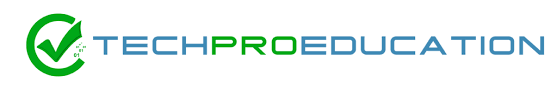

<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.
    Veysel
</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [2]:
df = pd.read_csv('store_sharing.csv')
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [4]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [5]:
df[df.isna().any(axis = 1)]
#there are no NaN

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season


In [6]:
df.duplicated().value_counts()

False    17414
dtype: int64

In [7]:
df.duplicated().unique()

#thre are no duplicated

array([False])

<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


In [8]:
df.head(2)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0


In [9]:
df['is_holiday'].value_counts()

#I wanted to know the data.It is not necessary for solution

0.0    17030
1.0      384
Name: is_holiday, dtype: int64

In [10]:
df['is_weekend'].value_counts()

#I wanted to know the data.It is not necessary for solution

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

In [11]:
df['season'].value_counts()

#I wanted to know the data.It is not necessary for solution

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [12]:
df['weather_code'].value_counts()

#I wanted to know the data.It is not necessary for solution

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [75]:
df['year'].value_counts()

#year i asagida yeni sütun ekledigim zaman olusturdum

2016    8699
2015    8643
2017      72
Name: year, dtype: int64

In [85]:
df['wind_speed'].value_counts().head(40)

12.0    842
14.0    832
11.0    832
15.0    828
13.0    828
16.0    803
10.0    707
17.0    705
9.0     672
18.0    614
8.0     587
19.5    572
6.5     550
7.0     468
22.0    461
6.0     405
24.0    403
5.0     398
23.0    396
21.0    378
19.0    360
26.0    343
25.0    333
18.5    330
20.0    322
20.5    275
27.0    234
7.5     231
28.0    204
4.0     198
2.0     175
30.5    145
29.0    142
21.5    130
5.5     126
3.0     106
29.5    104
17.5    100
30.0     87
33.0     81
Name: wind_speed, dtype: int64

In [13]:
print(df['t1'].unique().min())

print(df['t1'].unique().max())  #the temperature of wheater

#I wanted to know the data.It is not necessary for solution

-1.5
34.0


In [14]:
df['season'].unique()

#I wanted to know the data .It is not necessary for solution

array([3., 0., 1., 2.])

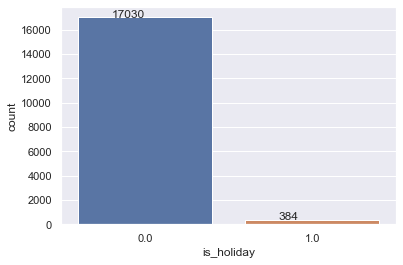

In [56]:
fig, df_weather_code = plt.subplots()
df_weather_code = sns.countplot(x = "is_holiday", data = df); 

for p in df_weather_code.patches:
    df_weather_code.annotate(p.get_height(), (p.get_x() +0.2, p.get_height()));
    
#I tried to plot same grapf, It is not necessary for solution

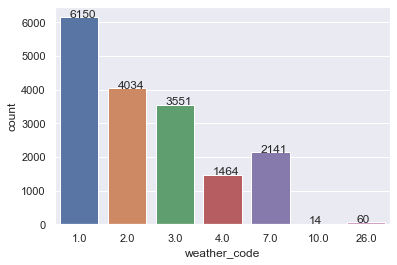

In [57]:
fig, df_is_holiday = plt.subplots()
df_is_holiday = sns.countplot(x = "weather_code", data = df); 

for p in df_is_holiday.patches:
    df_is_holiday.annotate(p.get_height(), (p.get_x() +0.2, p.get_height()));

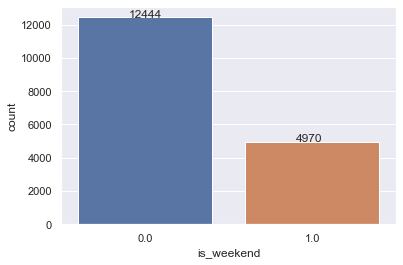

In [58]:
fig, df_is_weekend = plt.subplots()
df_is_weekend = sns.countplot(x = "is_weekend", data = df); 

for p in df_is_weekend.patches:
    df_is_weekend.annotate(p.get_height(), (p.get_x() +0.3, p.get_height()));
    
#I tried to plot same grapf, It is not necessary for solution

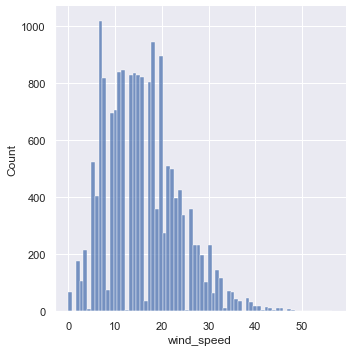

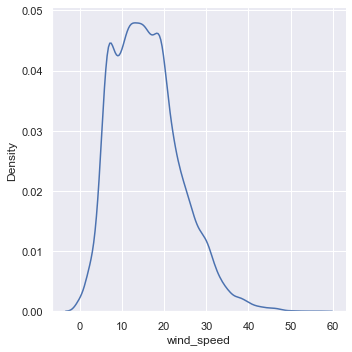

In [83]:
sns.displot(data = df, x = "wind_speed", kind = "hist");
sns.displot(data = df, x = "wind_speed", kind = "kde");

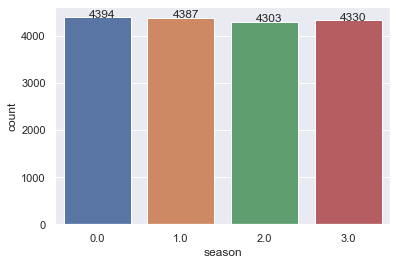

In [60]:
fig, df_season = plt.subplots()
df_season = sns.countplot(x = "season", data = df); 

for p in df_season.patches:
    df_season.annotate(p.get_height(), (p.get_x() +0.3, p.get_height()));
    
#I tried to plot same grapf, It is not necessary for solution

NameError: name 'handles' is not defined

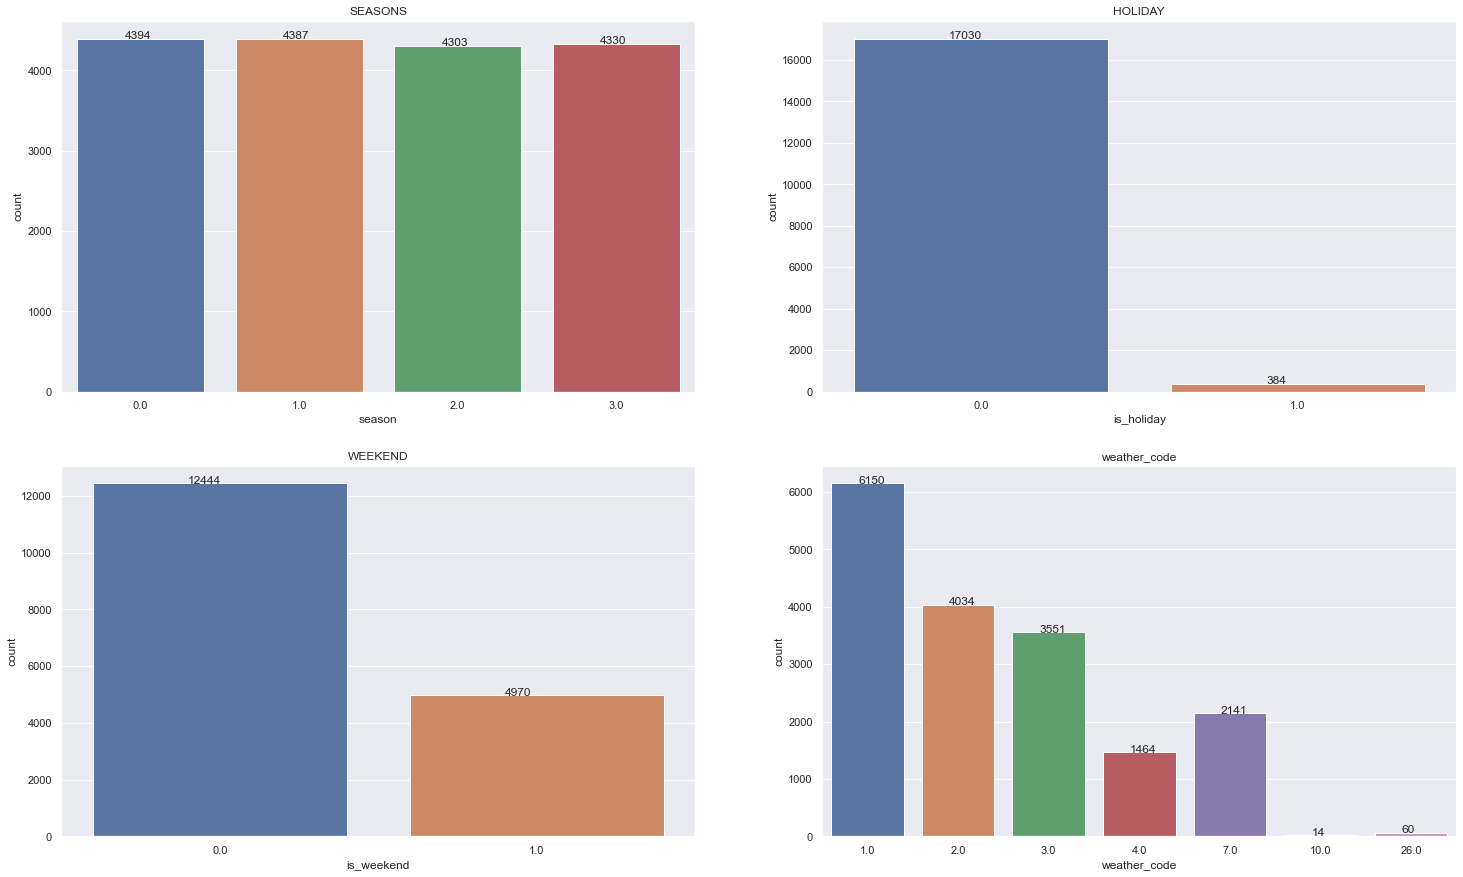

In [69]:
fig, ax = plt.subplots(2,2 , figsize = (25,15))

graph_1 = sns.countplot(ax = ax[0][0], x = "season", data = df)
graph_1.set_title("SEASONS")
for p in graph_1.patches:
    graph_1.annotate(p.get_height(), (p.get_x() +0.3, p.get_height()));
    
    

graph_2 = sns.countplot(ax = ax[0][1], x = "is_holiday", data = df)
graph_2.set_title("HOLIDAY")
for p in graph_2.patches:
    graph_2.annotate(p.get_height(), (p.get_x() +0.3, p.get_height()));
    
    

graph_3 = sns.countplot(ax = ax[1][0], x = "is_weekend", data = df)
graph_3.set_title("WEEKEND")
for p in graph_3.patches:
    graph_3.annotate(p.get_height(), (p.get_x() +0.3, p.get_height()));    
    
    
    
graph_4 = sns.countplot(ax = ax[1][1], x = "weather_code", data = df)
graph_4.set_title("weather_code")
for p in graph_4.patches:
    graph_4.annotate(p.get_height(), (p.get_x() +0.3, p.get_height()))

legend = ax[1][1].get_legend()
handles = legend.legendHandles
ax[1][1].legend(handles, ['Clear',
                     'Scattered Clouds',
                     'Broken Clouds',
                     'Cloudy',
                     'Rainy',
                     'Thunderstorm',
                     "Snowfall",
                     "Freezing Fog"], title='Weather Code');    
    
    

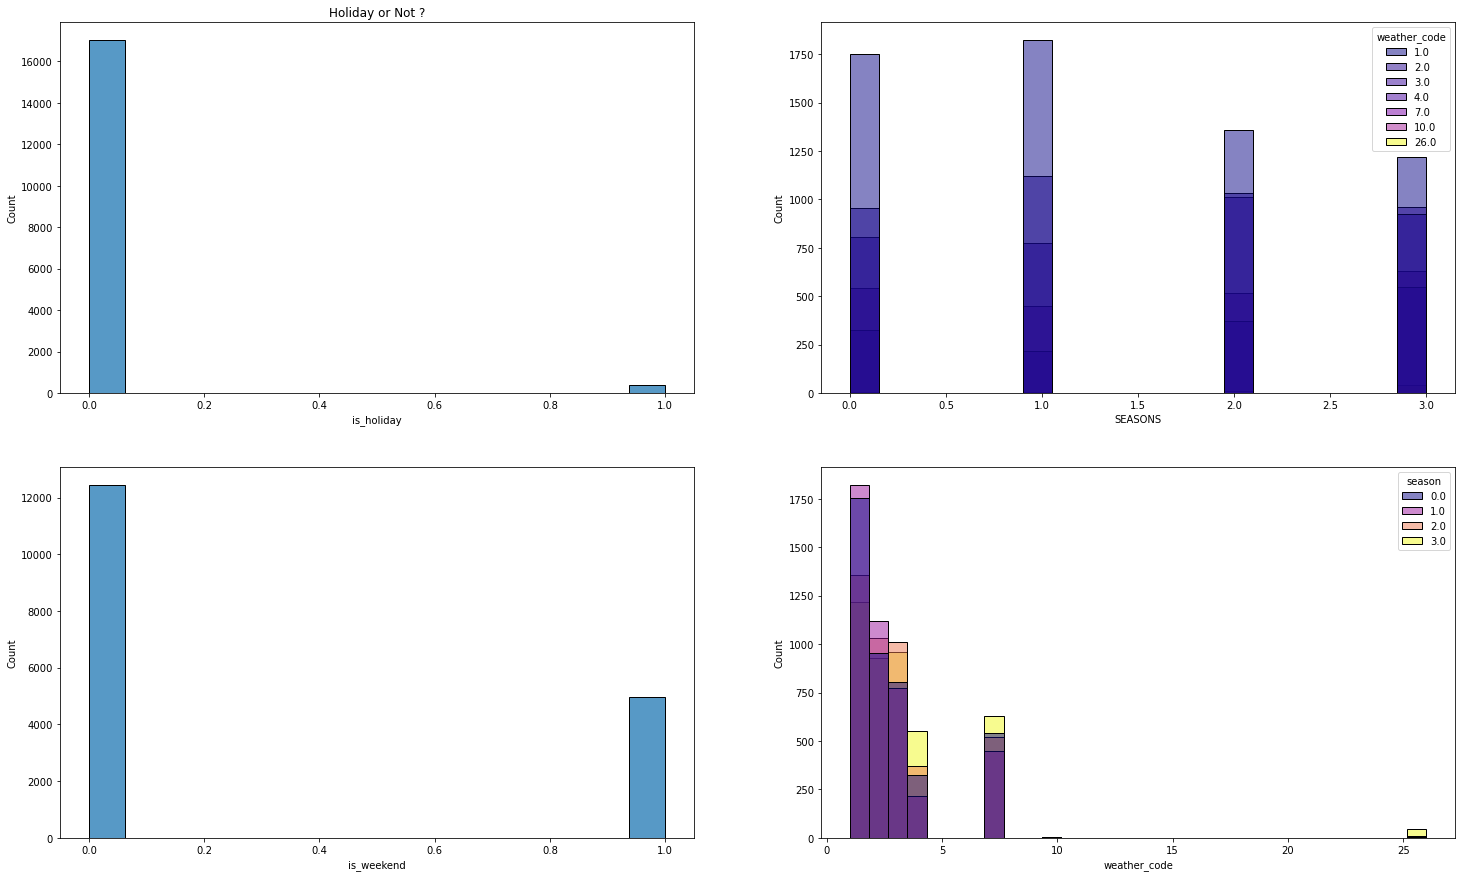

In [18]:
fig, ax = plt.subplots(2,2 , figsize = (25,15))


a = sns.histplot(ax = ax[0][0] , data = df , x = "is_holiday" )
a.set_title("Holiday or Not ?") # Değişkene atayım set yap.

b = sns.histplot(data = df , x = "season" , ax = ax[0][1] , hue = "weather_code" , palette = "plasma" )
b.set_xlabel("SEASONS")

#c = sns.histplot(x = df["is_weekend"] , ax = ax[1][0] , hue = df["weather_code"] )
c = sns.histplot( x = df["is_weekend"] , ax = ax[1][0])
d = sns.histplot(x = df["weather_code"] , ax = ax[1][1] , bins = 30 , hue = df["season"] , palette= "plasma" );

In [19]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [73]:
%matplotlib inline

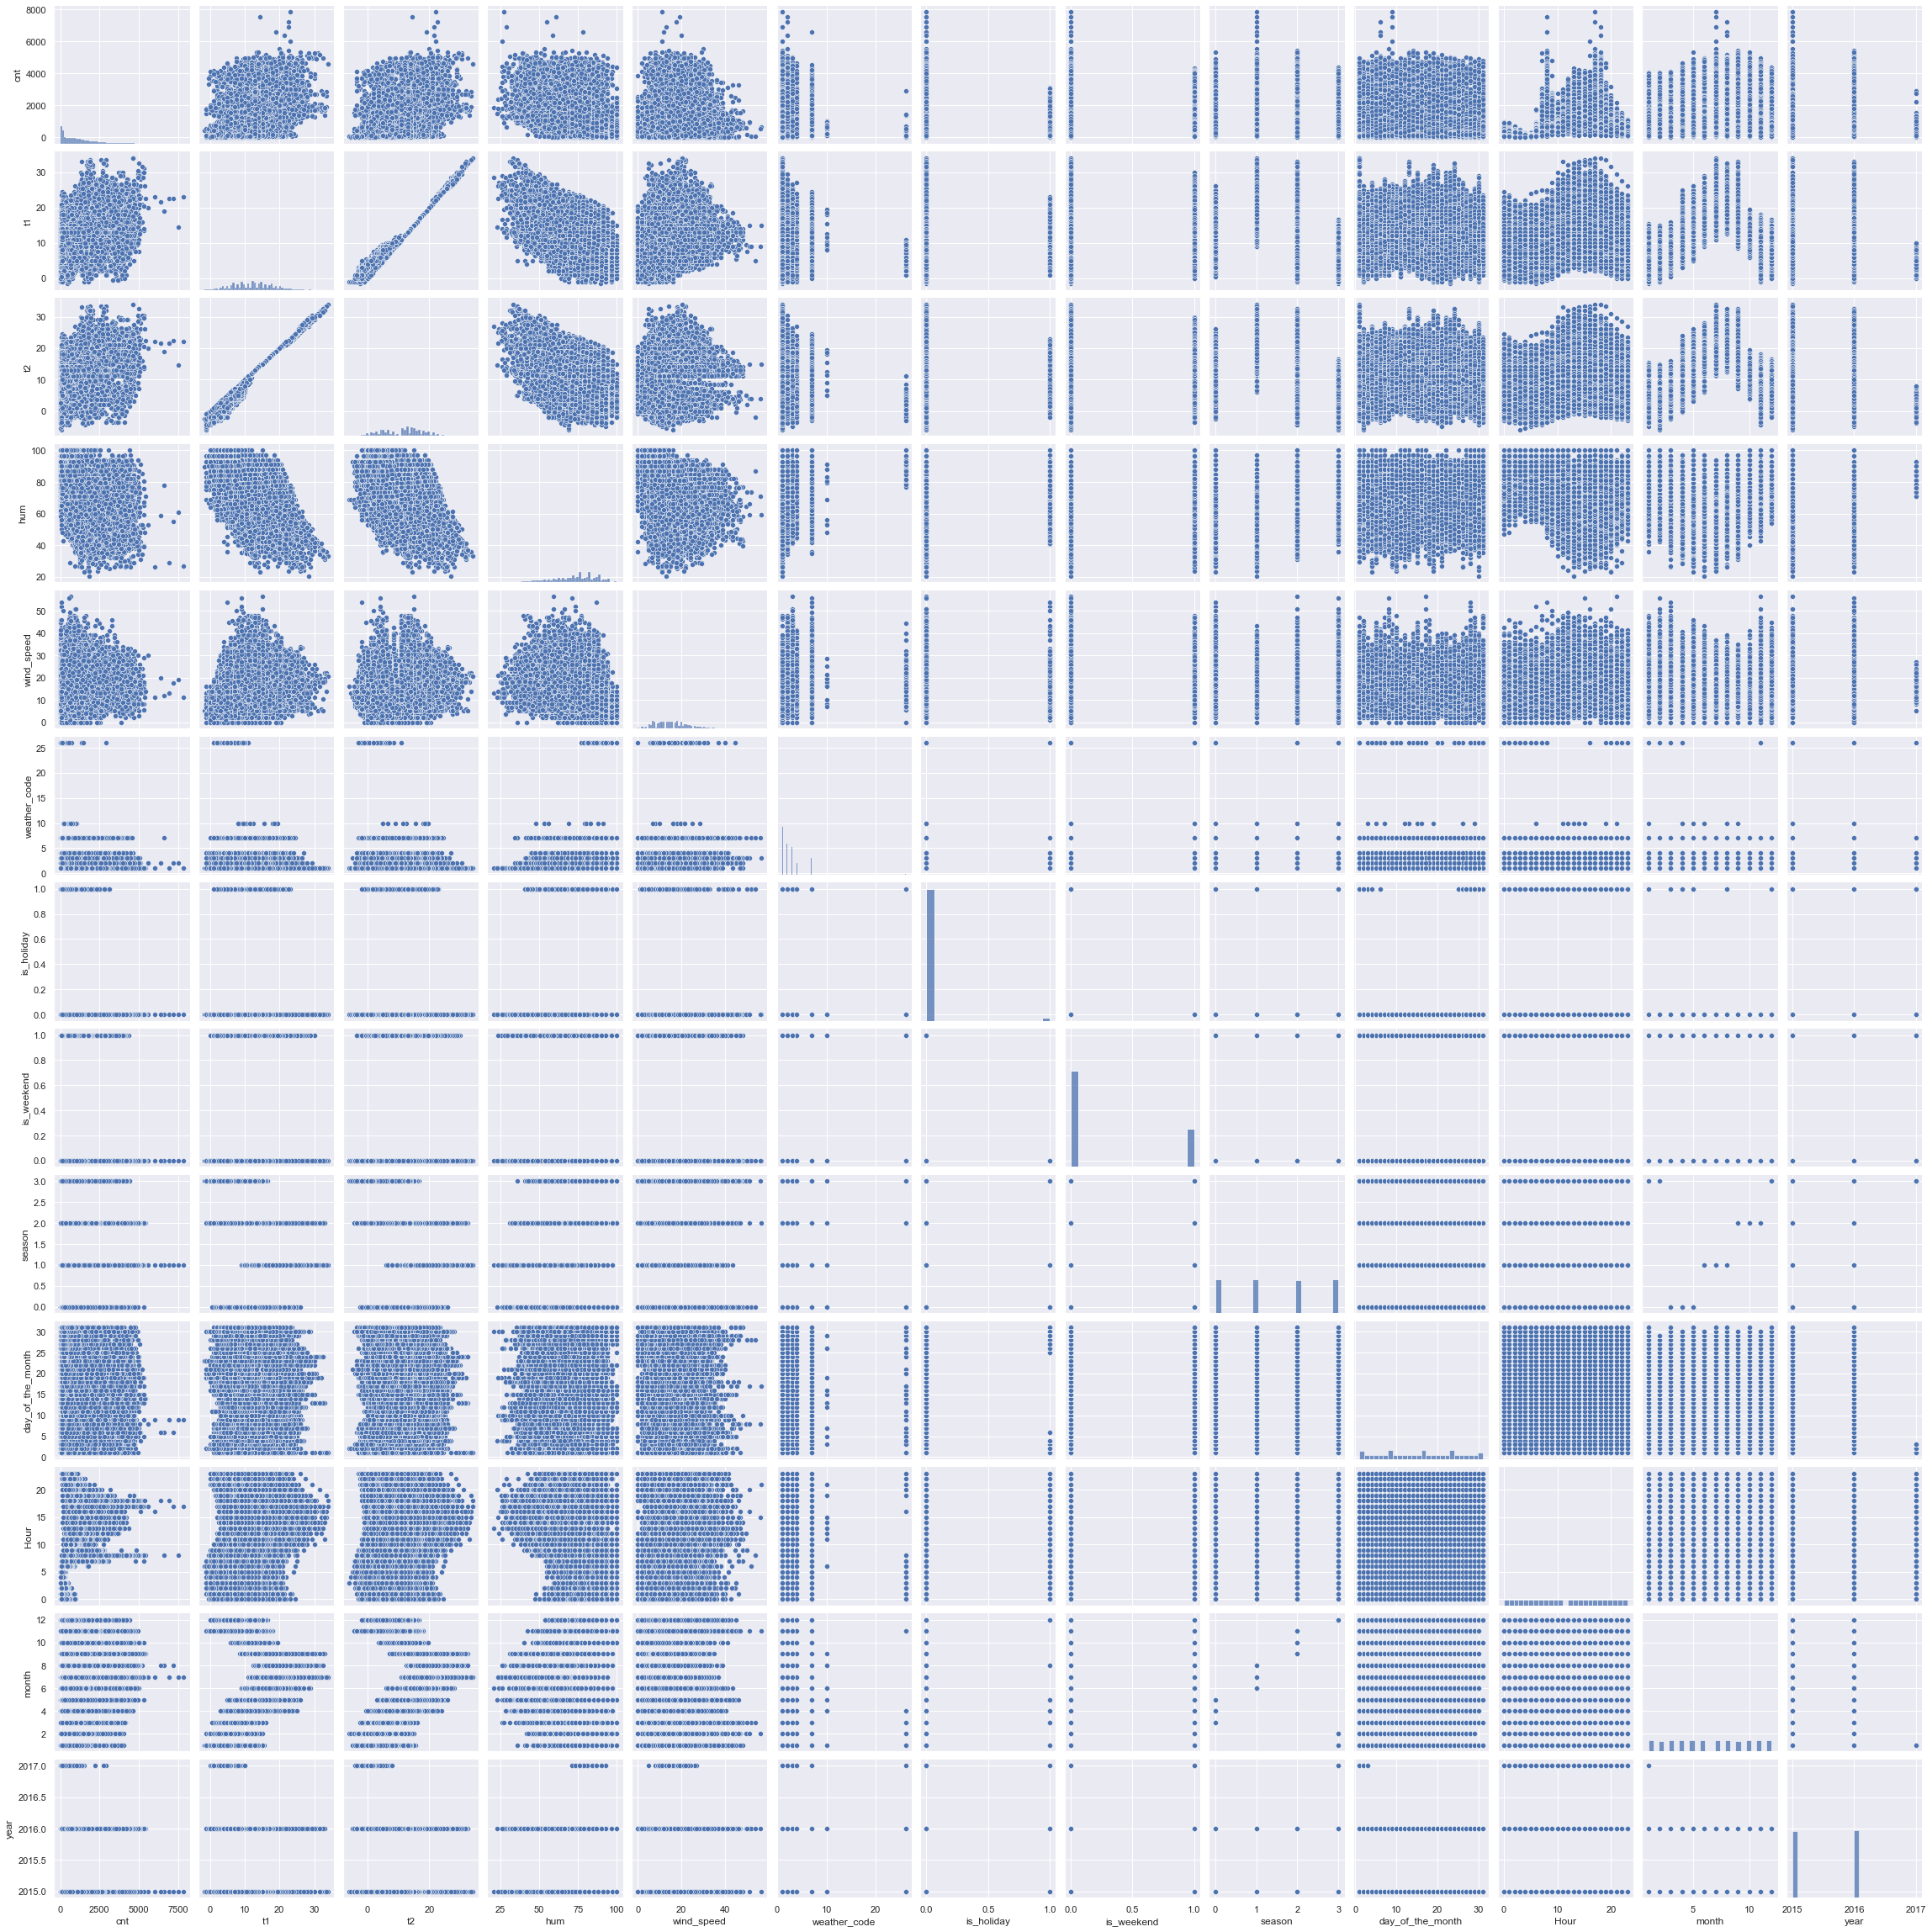

In [74]:
sns.pairplot(df)

# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [21]:
df.head(2)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [23]:
df['timestamp'] = df['timestamp'].astype('datetime64')

#I did change the type of column, so it is so easy to work with that
#for example, if I need for a column the month ,I can call the data with code 
#df['timestamp'].dt.month

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [25]:
df.index = df['timestamp']

In [26]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

In [27]:
from datetime import date, datetime, time
from babel.dates import format_date, format_datetime, format_time


df['day_of_the_week'] = df['timestamp'].apply(format_date, format='E', locale='de_DE')

In [28]:
df['day_of_the_month'] = df['timestamp'].dt.day

In [29]:
df['Hour'] =df['timestamp'].dt.hour

In [30]:
df['month'] =df['timestamp'].dt.month

In [31]:
df['year'] =df['timestamp'].dt.year

In [32]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day_of_the_week,day_of_the_month,Hour,month,year
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,So.,4,0,1,2015
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,So.,4,1,1,2015
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,So.,4,2,1,2015
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,So.,4,3,1,2015
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,So.,4,4,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,Di.,3,19,1,2017
2017-01-03 20:00:00,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,Di.,3,20,1,2017
2017-01-03 21:00:00,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,Di.,3,21,1,2017


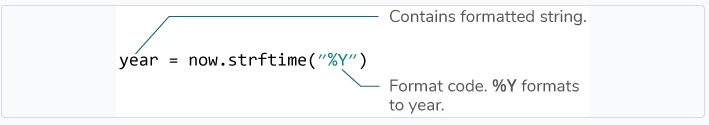

<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

<AxesSubplot:>

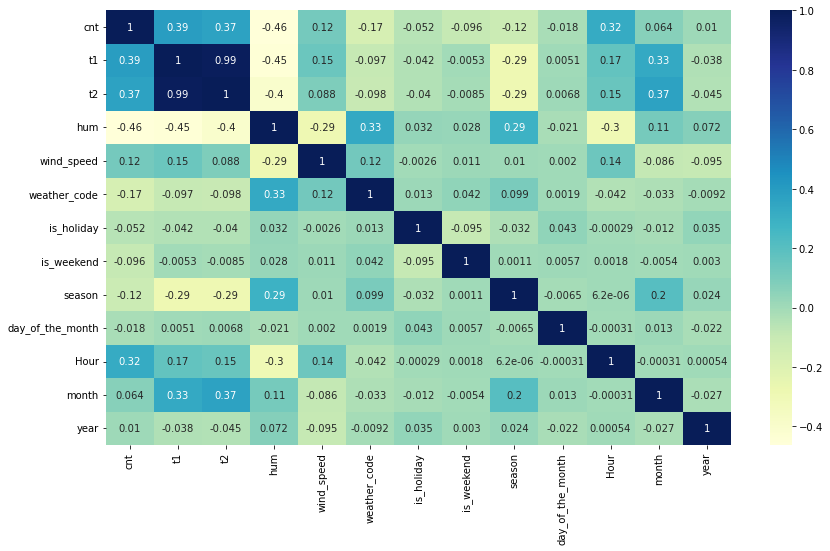

In [33]:
plt.figure(figsize = (14,8))
df_heatmap = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True);
df_heatmap

<AxesSubplot:>

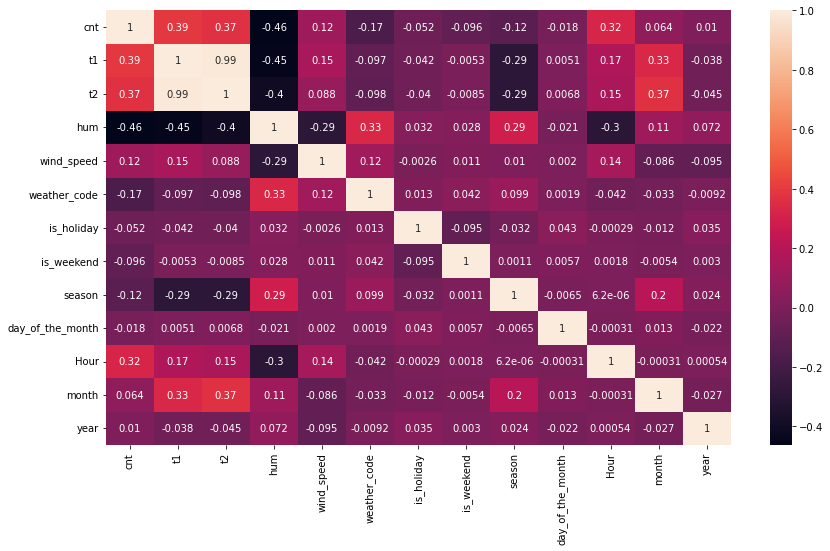

In [34]:
plt.figure(figsize = (14,8))
df_heatmap = sns.heatmap(df.corr(), annot = True);
df_heatmap

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

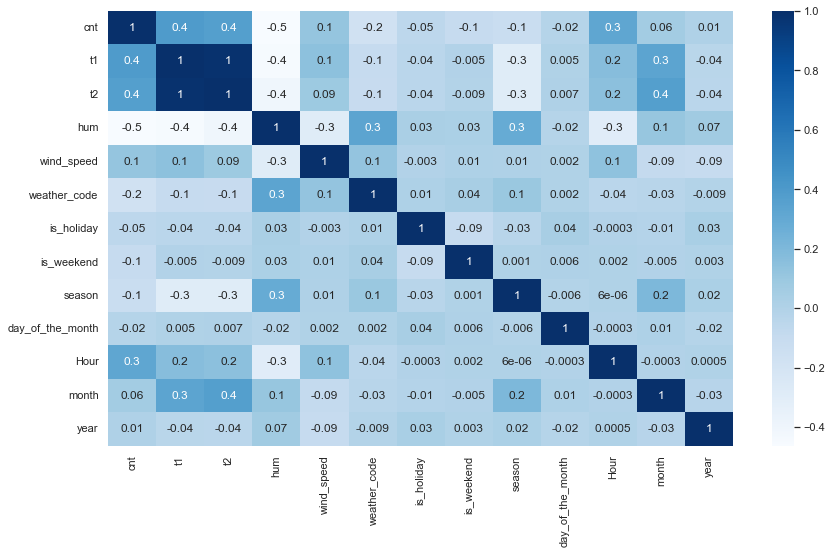

In [35]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
df_heatmap_2 = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

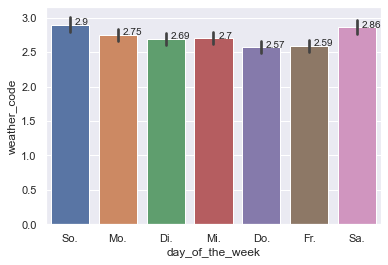

In [77]:
#and the other features with barplot


fig, ax=plt.subplots()
ax= sns.barplot(data=df, x='day_of_the_week', y='weather_code');
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)),(p.get_x()+0.5, p.get_height()));
    
    
#burda günlere göre havanin kodunun ortalma nerelerde gezdigini gösteriyor, zaten yukaridaki bir grafikten    
#havanin seasonlara göre cok büyük degisiklikler göstermedigini görmüstük

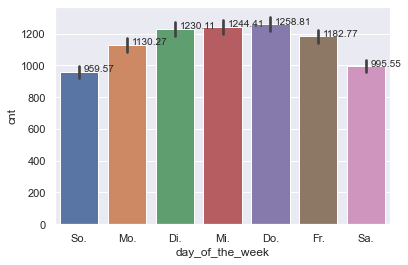

In [78]:
fig, ax=plt.subplots()
ax= sns.barplot(data=df, x='day_of_the_week', y='cnt');
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)),(p.get_x()+0.5, p.get_height()));

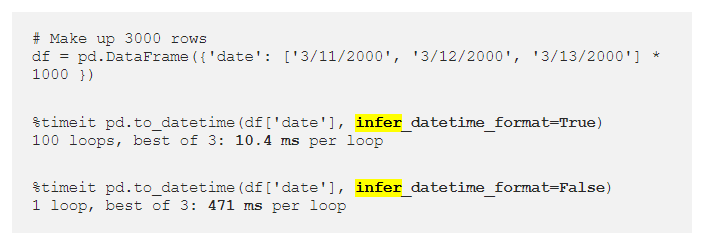

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

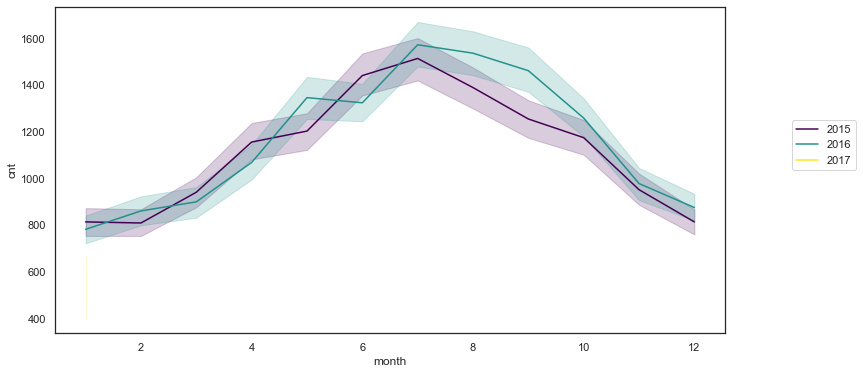

In [37]:
plt.figure(figsize=(12,6))

sns.lineplot(data=df, x='month' , hue='year', y='cnt',palette='viridis') #palette renklendirme komutu,koymasanda renkler veriyor aslinda

plt.legend(loc=(1.1,.5)) 
sns.set(style='darkgrid')

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

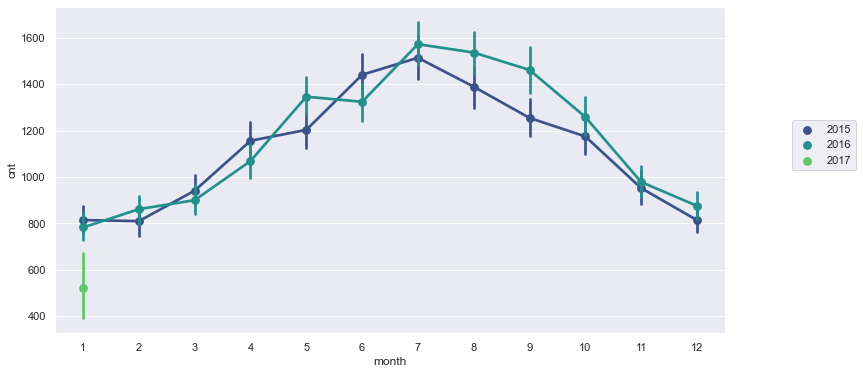

In [38]:
plt.figure(figsize = (12, 6))
sns.pointplot(data = df, x = "month", y = "cnt", hue = "year", palette= "viridis")
plt.legend(loc = (1.1, .5))
plt.show()

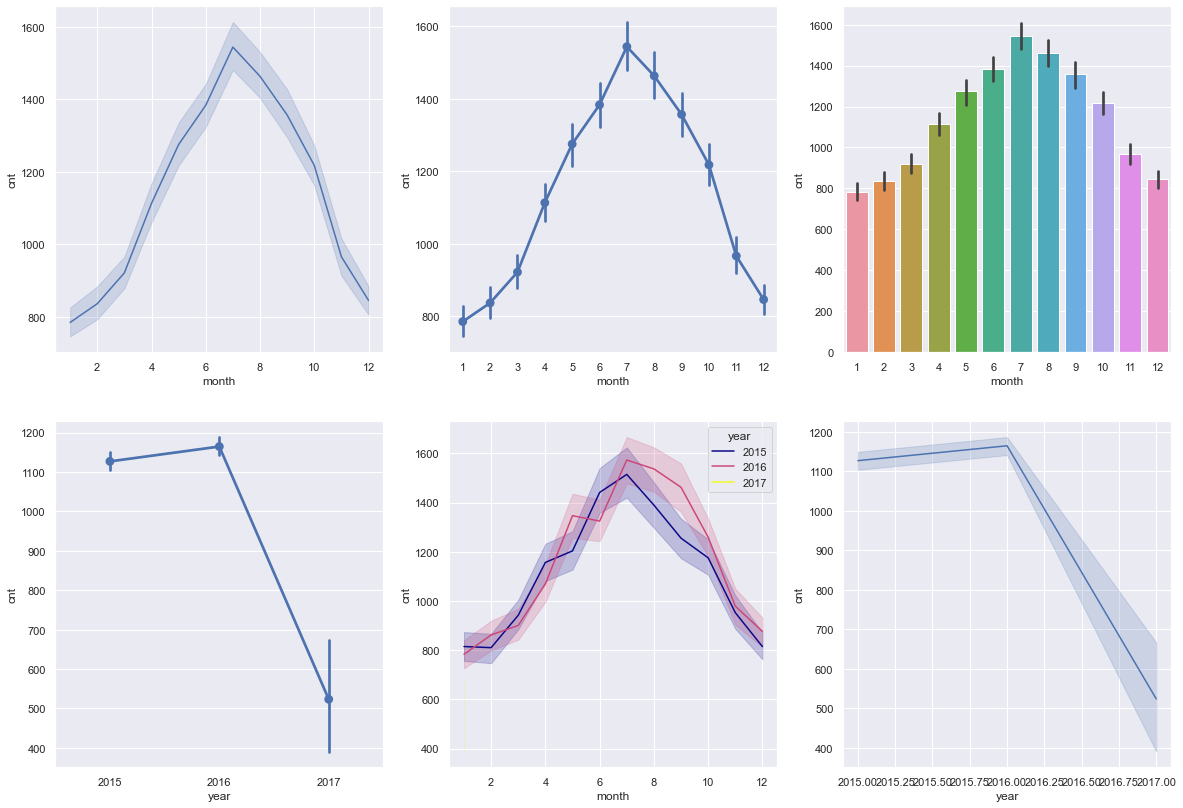

In [39]:
from matplotlib.pyplot import xlabel, ylabel


fig, ax = plt.subplots(2,3 , figsize = (20,14))

sns.lineplot( x = df["month"] , y = df["cnt"], ax = ax[0][0]);
sns.pointplot( x = df["month"] , y = df["cnt"], ax = ax[0][1]);
sns.barplot( x = df["month"] , y = df["cnt"], ax = ax[0][2]);
sns.pointplot( x = df["year"] , y = df["cnt"], ax = ax[1][0]);
sns.lineplot( x = df["month"] , y = df["cnt"] , hue = df["year"] , palette = "plasma" , ax = ax[1][1]);
sns.lineplot( x = df["year"] , y = df["cnt"], ax = ax[1][2]);

In [40]:
df.head(3)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day_of_the_week,day_of_the_month,Hour,month,year
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,So.,4,0,1,2015
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,So.,4,1,1,2015
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,So.,4,2,1,2015


<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

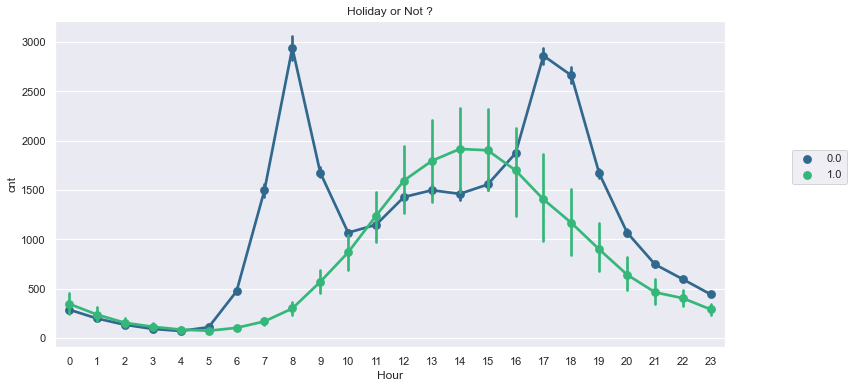

In [41]:
plt.figure(figsize = (12, 6))
a1 = sns.pointplot(data = df, x = "Hour", y = "cnt", hue = "is_holiday", palette= "viridis")
a1.set_title("Holiday or Not ?")
plt.legend(loc = (1.1, .5))
plt.show()

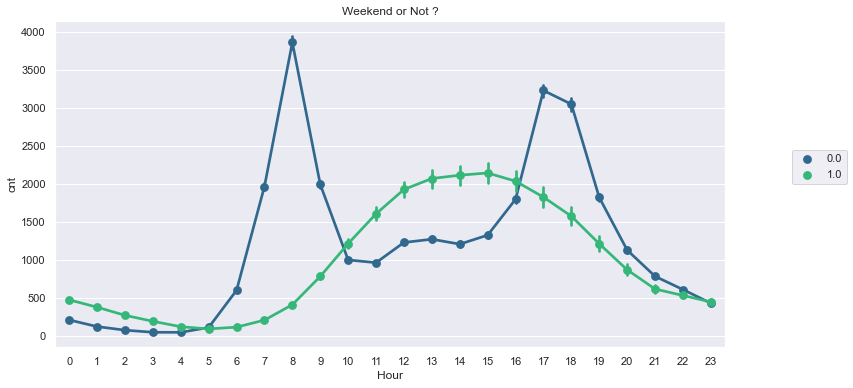

In [42]:
plt.figure(figsize = (12, 6))
b1 = sns.pointplot(data = df, x = "Hour", y = "cnt", hue = "is_weekend", palette= "viridis")
b1.set_title("Weekend or Not ?")
plt.legend(loc = (1.1, .5))
plt.show()

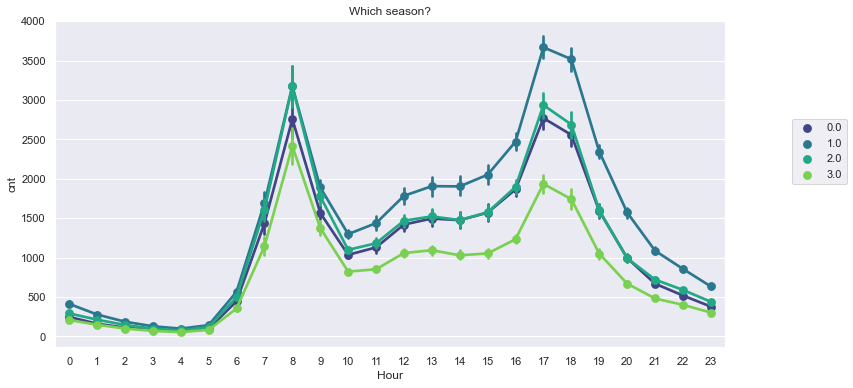

In [43]:
plt.figure(figsize = (12, 6))
c1 = sns.pointplot(data = df, x = "Hour", y = "cnt", hue = "season", palette= "viridis")
c1.set_title("Which season?")
plt.legend(loc = (1.1, .5))
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

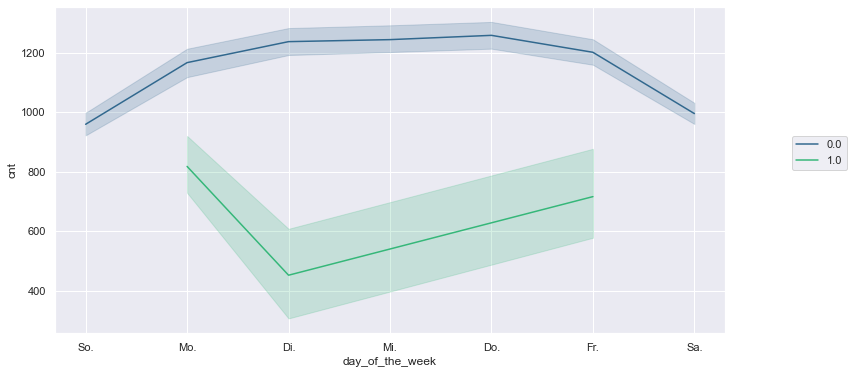

In [44]:
plt.figure(figsize=(12,6))

sns.lineplot(data=df, x='day_of_the_week' , hue='is_holiday', y='cnt',palette='viridis') #palette renklendirme komutu,koymasanda renkler veriyor aslinda

plt.legend(loc=(1.1,.5)) 
sns.set(style='darkgrid')

In [45]:
df.is_holiday.value_counts()

0.0    17030
1.0      384
Name: is_holiday, dtype: int64

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

In [46]:
df.head(2)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day_of_the_week,day_of_the_month,Hour,month,year
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,So.,4,0,1,2015
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,So.,4,1,1,2015


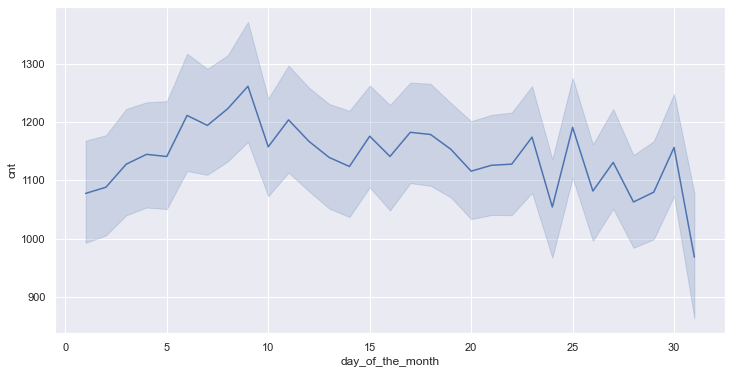

In [47]:
plt.figure(figsize=(12,6))

sns.lineplot(data=df, x='day_of_the_month', y='cnt',palette='viridis') #palette renklendirme komutu,koymasanda renkler veriyor aslinda

sns.set(style='darkgrid')

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

In [48]:
df.year.value_counts()

2016    8699
2015    8643
2017      72
Name: year, dtype: int64

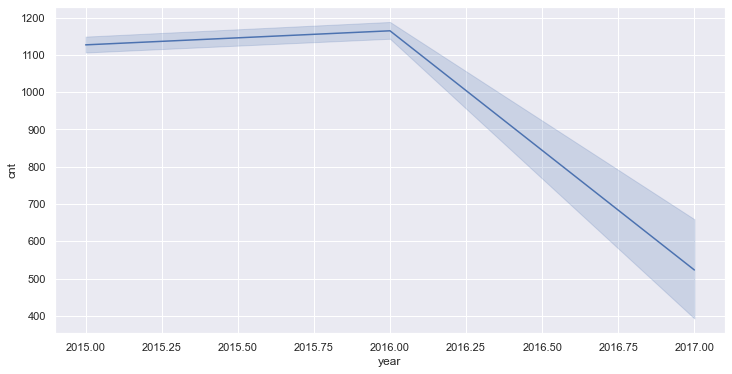

In [49]:
plt.figure(figsize=(12,6))

sns.lineplot(data=df, x='year', y='cnt',palette='viridis') #palette renklendirme komutu,koymasanda renkler veriyor aslinda

sns.set(style='darkgrid')

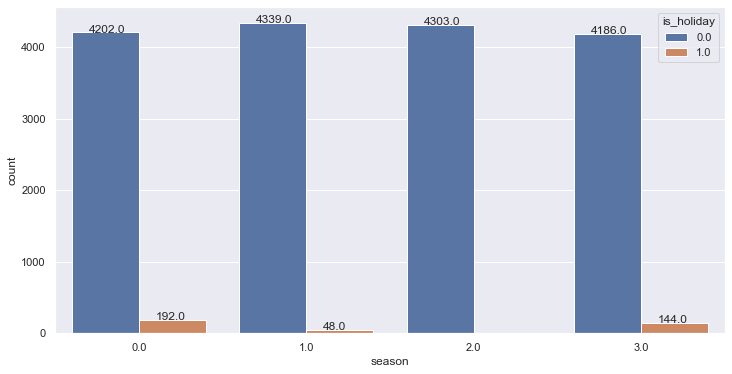

In [50]:
fig, ax = plt.subplots(figsize = (12, 6))   


ax = sns.countplot(x = "season", data = df, hue = "is_holiday");

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)),(p.get_x()+0.1, p.get_height()));

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

In [51]:
df.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

In [52]:
df1 = df.groupby('is_weekend')['cnt'].sum()
df1

is_weekend
0.0    15048216
1.0     4857756
Name: cnt, dtype: int64

TypeError: 'AxesSubplot' object is not subscriptable

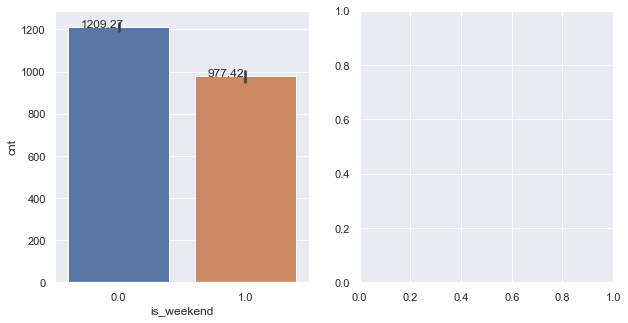

In [53]:
fig, ax=plt.subplots(1,2 ,figsize = (10,5))
ax= sns.barplot(data=df, x='is_weekend', y='cnt', ax = ax[0]);
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)),(p.get_x()+0.1, p.get_height()));

mylabels = ['weekday', 'weekend']    
    
bx = plt.pie(df1,labels=mylabels,labeldistance=0.75,autopct='%.2f' , bx = ax[1]);    

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,6))

sns.barplot(x = df["is_weekend"] , y = df["cnt"] , ax = ax[0]);
plt.pie(x = df.groupby("is_weekend").cnt.mean(), labels = ["Weekday" , "Weekend"] , autopct= '%.2f');

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

In [ ]:
2015 ve  2016 yillarinda paylasilan bisiklet sayilari birbirine yakindir
Holiday olmayan günlerda bisiklet paylasimi cok belirgin birsekilde  daha fazla olmustur
En cok bisiklet paylasimi acik havalarda olmustur, ve hava kötülestikce bisiklet paylasimi azalmistir yani yaz aylarinda bisiklet üaylasimi daha fazla olmustur
En fazla paylasim temmuz ayinda olmustur
Hafta ici bisiklet paylasimi ,  hafta sonunun iki bucuk katidir,
Sali carsamba ve persembe günlerinde bisiklet paylasimi diger günlere göre daha fazla olmustur
Sabah 8:00 ve aksam 17:00 saatleri paylasimin en fazla oldugu saatlerdir
Hava sicakligi ile paylasilan biseklet sayilari arasinda pozitif bir iliski vardir (0.39)
Rüzgar hizi ile bisiklet paylasimi arasinda bir iliski kuramadim


Yaz aylarinda daha cok paylasim olmasina ragmen, neden SEAson grafiginde degerler birbirine cok yakin


<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

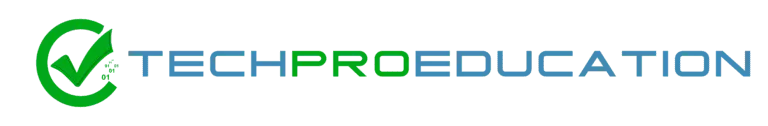